# 파이썬 데이터 시작화 마스터

## 2장 데이터 분석과 시각화

- 충분한 데이터가 있는가?
- 이 데이터가 존재하는 기간이 있는가?
- 지구상에 이 데이터에 영향을 줄 어떤 연상될 만한 이벤트가 있는가?

- 데이터 수집, 분석, 필터링, 데이터 마이닝 및 정제, 시각적 표현 및 인터랙션 하기
- 데이터로부터 흥미있는 이야기 생성하기
- 인지, 표현 방법 및 시각화를 위한 최선의 방법
- 인터랙티브한 시각화 만들기 - 이벤트 리스너 및 배치에 대한 탐험

### 시각화는 왜 계획이 필요한가?

- 외부 소스, 웹사이트, 디스크에 있는 파일들로부터 데이터를 가져오기하고 수집한다
- 데이터를 분석, 정제하거나 데이터 자체를 줄이기 위해서 프로그래밍을 통해 데이터를 파싱하고 필터링한다.
- 잡음과 불필요한 데멘션을 제거하고 패턴을 발견하기 위해서 분석하고 정제한다.
- 더 접근 가능하고 이해할 수 있는 방식으로 데이터를 표현해 데이터와 인터랙션한다

### 에볼라 예제

In [111]:
import numpy as np
import pandas as pd
import csv 
import operator 
import datetime as dt  
import matplotlib.pyplot as plt  

eboladata = pd.read_csv("/Users/chosikc/Sites/MasteringPythonDataVisualization/Code/Chapter2/ebola.csv")
filtereddata = eboladata[eboladata["value"]>0]

filtereddata.head()


,Indicator,Country,Date,value
0,Cumulative number of confirmed Ebola cases,Guinea,2014-08-29,482.0
1,Cumulative number of probable Ebola cases,Guinea,2014-08-29,141.0
2,Cumulative number of suspected Ebola cases,Guinea,2014-08-29,25.0
3,"Cumulative number of confirmed, probable and s...",Guinea,2014-08-29,648.0
4,Cumulative number of confirmed Ebola cases,Liberia,2014-08-29,322.0


In [112]:
filtered_len = filtereddata["Indicator"].str.contains("deaths")

print (type(filtereddata) )

<class 'pandas.core.frame.DataFrame'>


In [113]:
# sorteddata = sorted(filtereddata, key=operator.itemgetter(1))  
# print(type(sorteddata))

In [178]:
with open('/Users/chosikc/Sites/MasteringPythonDataVisualization/Code/Chapter2/ebola.csv', 'rt') as f: 
  filtereddata = [row for row in csv.reader(f) if row[3] != "0.0" and 
  row[3] != "0" and "deaths" in row[0]] 

In [179]:
import matplotlib.pyplot as plt  
import csv 
import operator 
import datetime as dt  

with open('/Users/chosikc/Sites/MasteringPythonDataVisualization/Code/Chapter2/ebola.csv', 'rt') as f: 
  filtereddata = [row for row in csv.reader(f) if row[3] != "0.0" and 
  row[3] != "0" and "deaths" in row[0]] 

In [180]:
sorteddata_1 = sorted(filtereddata, key=operator.itemgetter(1)) 

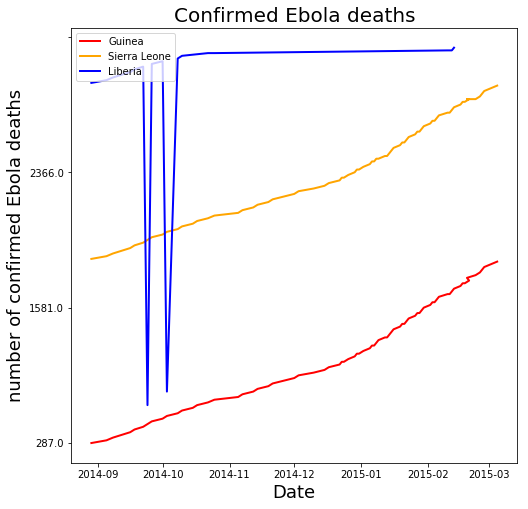

In [181]:
guineadata_1  = [row for row in sorteddata_1 if row[1] == "Guinea" and 
    row[0] == "Cumulative number of confirmed Ebola deaths"] 
sierradata_1  = [row for row in sorteddata_1 if row[1] == "Sierra Leone" and 
    row[0] == "Cumulative number of confirmed Ebola deaths"] 
liberiadata_1 = [row for row in sorteddata_1 if row[1] == "Liberia" and 
    row[0] == "Cumulative number of confirmed Ebola deaths"] 

g_x = [dt.datetime.strptime(row[2], '%Y-%m-%d').date() for 
       row in guineadata_1] 
g_y = [row[3] for row in guineadata_1] 

s_x = [dt.datetime.strptime(row[2], '%Y-%m-%d').date() for 
       row in sierradata_1] 
s_y = [row[3] for row in sierradata_1] 

l_x = [dt.datetime.strptime(row[2], '%Y-%m-%d').date() for
       row in liberiadata_1] 
l_y = [row[3] for row in liberiadata_1] 

plt.figure(figsize = (8,8))

max_y = float(max(max(g_y), max(s_y), max(l_y)))
plt.yticks(np.arange(0, max_y, step=50))

plt.plot(g_x, g_y, color='red', linewidth = 2, label = "Guinea") 
plt.plot(s_x, s_y, color='orange', linewidth = 2, label = "Sierra Leone") 
plt.plot(l_x, l_y, color='blue', linewidth = 2, label = "Liberia")  

plt.xlabel('Date', fontsize = 18)
plt.ylabel('number of confirmed Ebola deaths', fontsize = 18)
plt.title('Confirmed Ebola deaths', fontsize = 20)

plt.legend(loc = 2)

plt.show()

In [182]:
sorteddata_2 = sorted(filtereddata, key=operator.itemgetter(1)) 

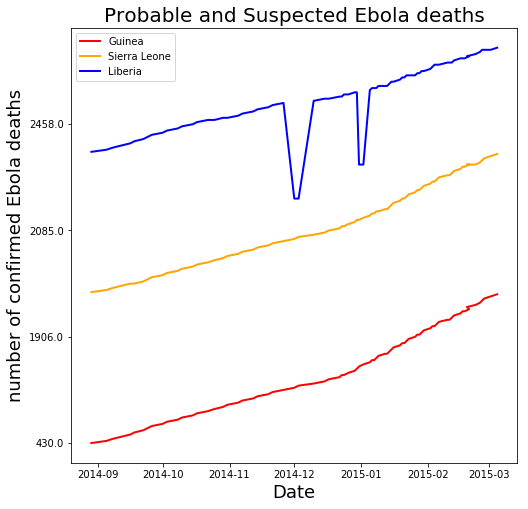

In [183]:
guineadata_2  = [row for row in sorteddata_2 if row[1] == "Guinea" and
    row[0] == "Cumulative number of confirmed, probable and suspected Ebola deaths"]
sierradata_2 = [row for row in sorteddata_2 if row[1] == "Sierra Leone" and
    row[0] == "Cumulative number of confirmed, probable and suspected Ebola deaths"]
liberiadata_2 = [row for row in sorteddata_2 if row[1] == "Liberia" and 
    row[0] == "Cumulative number of confirmed, probable and suspected Ebola deaths"]

g_x = [dt.datetime.strptime(row[2], '%Y-%m-%d').date() for
       row in guineadata_2]
g_y = [row[3] for row in guineadata_2]

s_x = [dt.datetime.strptime(row[2], '%Y-%m-%d').date() for
       row in sierradata_2]
s_y = [row[3] for row in sierradata_2]

l_x = [dt.datetime.strptime(row[2], '%Y-%m-%d').date() for
       row in liberiadata_2]
l_y = [row[3] for row in liberiadata_2]

plt.figure(figsize = (8,8))

max_y = float(max(max(g_y), max(s_y), max(l_y)))
plt.yticks(np.arange(0, max_y, step=50))

plt.plot(g_x, g_y, color='red', linewidth = 2, label = "Guinea") 
plt.plot(s_x, s_y, color='orange', linewidth = 2, label = "Sierra Leone") 
plt.plot(l_x, l_y, color='blue', linewidth = 2, label = "Liberia")  

plt.xlabel('Date', fontsize = 18)
plt.ylabel('number of confirmed Ebola deaths', fontsize = 18)
plt.title('Probable and Suspected Ebola deaths', fontsize = 20)

plt.legend(loc = 2)

plt.show()


### 스포츠 예제

#### 시각적으로 결과를 표현하기

### 데이터를 이용해 즐거운 이야기 만들기

#### 왜 이야기는 중요한가?

#### 독자 중심의 이야기

##### 갭마인더

##### 미국의 주별 유권자 경향

##### 미국 내 사망률

##### 이야기를 위한 몇 가지 다른 예

##### 저자 중심의 이야기

### 인식 방법과 표현 방법

- 과학의 시각화 : 고유한 물리적 개체를 가지는 과학적 데이터양을 포함
- 정보의 시각화  : 추상적인 정보를 포함<br>
<br>
- 데이터 분석 향상을 위해 시각적으로 표현
- 데이터 이해, 아이디어, 가설, 통찰을 위한 시각적 표현 모델
- 가설을 보조해주거나 모순되는 증거를 찾기 위해 사용자의 모델을 향상
- 아이디어를 공유하고 조직화하기 위해 사용자를 도와주는 것

#### 지각에서의 게슈탈트 법칙

- 근접성 Proximity:  물체가 서로 가까이 있거나 서로 연결돼 있을 때, 그룹으로 인식해, 물체들의 분리를 줄임
- 유사성 Similarity: 물체들이 비슷한 속성, 색, 형태를 가질 떄 같은 그룹으로 인식
- 공동 운명 Common fate : 한 공간에 근접성과 유사성을 모두 만족하는 물체들이 있을 경우, 물체들의 방향성을 기준으로 다시 그룹화
- 좋은 연속성 Good continuation
- 폐쇄성 Closeure

### 시각화를 위한 좋은 사례들

- 비교와 순위
- 상호 연관성
- 분포
- 지역 특정 혹은 지리 정보
- 일부와 전체의 관계
- 시간에 따른 경향

#### 비교와 순위

#### 상호 연관성

#### 분포

#### 지역 특정 혹은 지리정보

#### 부분에서 전체의 관계

#### 시간 경과에 따른 경향

### 파이썬을 이용한 시각화 도구

#### 개발 도구

##### Enthought의 Canopy

##### 컨티넘 애널리틱스의 아나콘다

### 인터랙티브 시각화

#### 이벤트 리스너

#### 레이아웃

##### 원형 레이아웃

##### 방사형 레이아웃

##### 풍선 레이아웃

### 요약 